In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

[(27, 28), (33, 34), (28, 29), (34, 35), (29, 30), (35, 36), (30, 31), (36, 37), (31, 32), (37, 38)] [(1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3)]


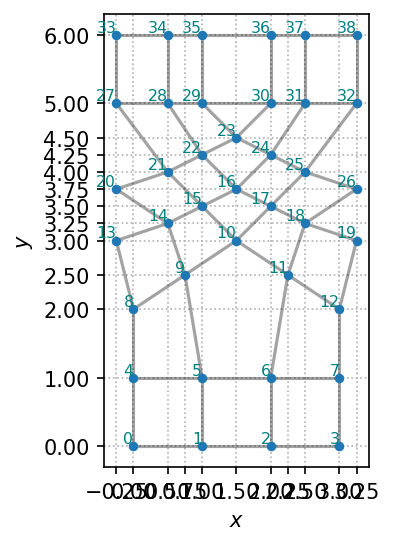

In [2]:
lattice = Lattice()
lattice.add_sites(
    [
        (0, 0),
        (1, 0),
        (2, 0),
        (3, 0),
        (0, 1),
        (1, 1),
        (2, 1),
        (3, 1),
        (0, 2),
        (0.75, 2.5),
        (1.5, 3),
        (2.25, 2.5),
        (3, 2),
        (-0.25, 3),
        (0.5, 3.25),
        (1, 3.5),
        (1.5, 3.75),
        (2, 3.5),
        (2.5, 3.25),
        (3.25, 3),
        (-0.25, 3 + 0.75),
        (0.5, 3.25 + 0.75),
        (1, 3.5 + 0.75),
        (1.5, 3.75 + 0.75),
        (2, 3.5 + 0.75),
        (2.5, 3.25 + 0.75),
        (3.25, 3 + 0.75),
        (-0.25, 3 + 1.25 + 0.75),
        (0.5, 3.25 + 1.0 + 0.75),
        (1, 3.5 + 0.75 + 0.75),
        (2, 3.5 + 0.75 + 0.75),
        (2.5, 3.25 + 1.0 + 0.75),
        (3.25, 3 + 1.25 + 0.75),
        (-0.25, 3 + 1.25 + 0.75 + 1.0),
        (0.5, 3.25 + 1.0 + 0.75 + 1.0),
        (1, 3.5 + 0.75 + 0.75 + 1.0),
        (2, 3.5 + 0.75 + 0.75 + 1.0),
        (2.5, 3.25 + 1.0 + 0.75 + 1.0),
        (3.25, 3 + 1.25 + 0.75 + 1.0),
    ]
)

lattice.add_bonds(
    [(j + i * 4, j + 1 + i * 4) for j in range(3) for i in range(2)],
    [(1, 3) for i in range(6)],
)
# lattice.add_bonds([(4+i, 4+i+1) for i in range(3)])
lattice.add_bonds(
    [(2 * 4 + j, 2 * 4 + j + 1) for j in range(4)], [(1, 3) for i in range(4)]
)
lattice.add_bonds(
    [
        (2 * 4 + 5 + j + i * 7, 2 * 4 + 5 + j + 1 + i * 7)
        for j in range(6)
        for i in range(2)
    ],
    [(1, 3) for i in range(12)],
)
print(
    [
        (2 * 4 + 5 + 2 * 7 + j + i * 6, 2 * 4 + 5 + 2 * 7 + j + 1 + i * 6)
        for j in range(5)
        for i in range(2)
    ],
    [(1, 3) for i in range(10)],
)
lattice.add_bonds(
    [
        (2 * 4 + 5 + 2 * 7 + j + i * 6, 2 * 4 + 5 + 2 * 7 + j + 1 + i * 6)
        for j in range(5)
        for i in range(2)
    ],
    [(1, 3) for i in range(10)],
)

lattice.add_bonds([(0, 4), (5, 1), (6, 2), (7, 3)], [(0, 2) for i in range(4)])
lattice.add_bonds([(4, 8), (5, 9), (6, 11), (7, 12)], [(0, 2) for i in range(4)])
lattice.add_bonds(
    [(8, 13), (9, 14), (10, 15), (10, 17), (11, 18), (12, 19)],
    [(0, 2) for i in range(6)],
)
lattice.add_bonds(
    [(14, 20), (15, 21), (16, 22), (16, 24), (17, 25), (18, 26)],
    [(0, 2) for i in range(6)],
)
lattice.add_bonds(
    [(21, 27), (22, 28), (23, 29), (23, 30), (24, 31), (25, 32)],
    [(0, 2) for i in range(6)],
)
lattice.add_bonds([(27 + j, 33 + j) for j in range(6)], [(0, 2) for i in range(6)])


# lattice.remove_sites([38, 32, 26, 19])
# lattice.add_sites([(-1, i) for i in range(3)])

flagged_bonds_triangle = [(29, 23), (28, 22), (27, 21)]
flagged_bonds_pentagon = [(10, 9), (15, 14), (21, 20)]
num_sites = lattice.get_num_sites()
lattice_sites = lattice.get_sites()

# lattice.add_bonds([(35, 0), (36, 4), (37, 8), (3, 35), (7, 36), (12, 37), (18, 13), (18, 19), (24, 19), (12, 13), (29, 25), (34, 30), (24, 25)], [(1, 3) for i in range(13)])
# lattice.add_bonds([(35, 36), (36, 37), (30, 35), (31, 0), (32, 1), (33, 2), (34, 3)], [(0, 2) for i in range(7)])

lattice.plot(True)

[74 75 76 77 78 79 80 81]
Lowest found energy:  0.017970340296930468
Index of lowest absolute energy:  77


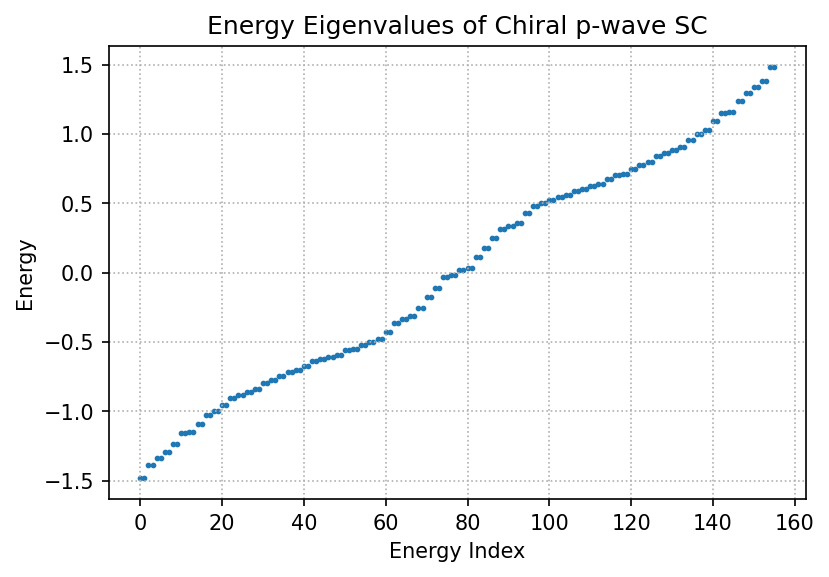

Index = 77 with energy E = -0.017970340296930468


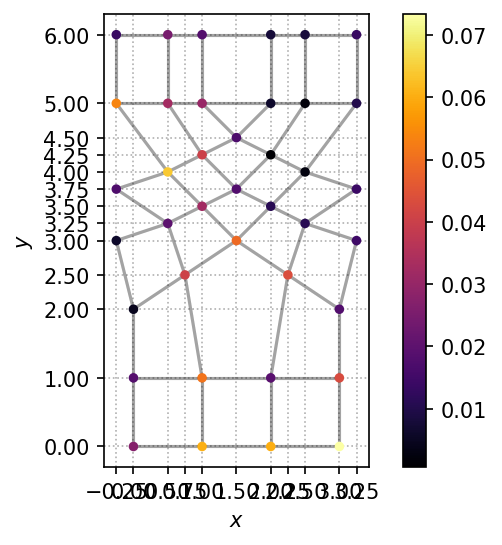

In [3]:
mu = 0.5
delta = complex(0.5, 0.0)

Ham_constructor = HamiltonianConstructor(mu, 0.5, 0.5, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

hop_phase_triangle = np.exp(complex(0, 1) * np.pi / 2)
for flagged_bond in flagged_bonds_triangle:
    Ham_constructor.add_phase(
        H_direct_lattice, flagged_bond, hop_phase_triangle, num_sites
    )

hop_phase_pentagon = hop_phase_triangle.conjugate()
for flagged_bond in flagged_bonds_pentagon:
    Ham_constructor.add_phase(
        H_direct_lattice, flagged_bond, hop_phase_pentagon, num_sites
    )

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)
plt.show()

for gs_idx in range(gs_idx, gs_idx + 1):
    print(f"Index = {gs_idx} with energy E = {energies[gs_idx]}")
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(False, c=(gs_probabilities), cmap=color_map)
    plt.colorbar(sc)
    plt.show()